# Multiple Linear Regression Lab

## Import the relevant libraries

In [1]:
import numpy as np
import pandas as pd 
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.model_selection import cross_val_score
from sklearn.feature_selection import f_regression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
from sklearn.preprocessing import StandardScaler
import statsmodels.api as sm

%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

## Load the data

In [2]:
df = pd.read_csv('kc_house_data_train.csv')
df.head(10)

,Unnamed: 0,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,0,2591820310,20141006T000000,365000.0,4,2.25,2070,8893,2.0,0,...,8,2070,0,1986,0,98058,47.4388,-122.162,2390,7700
1,1,7974200820,20140821T000000,865000.0,5,3.00,2900,6730,1.0,0,...,8,1830,1070,1977,0,98115,47.6784,-122.285,2370,6283
2,2,7701450110,20140815T000000,1038000.0,4,2.50,3770,10893,2.0,0,...,11,3770,0,1997,0,98006,47.5646,-122.129,3710,9685
3,3,9522300010,20150331T000000,1490000.0,3,3.50,4560,14608,2.0,0,...,12,4560,0,1990,0,98034,47.6995,-122.228,4050,14226
4,4,9510861140,20140714T000000,711000.0,3,2.50,2550,5376,2.0,0,...,9,2550,0,2004,0,98052,47.6647,-122.083,2250,4050
5,5,1761300310,20140827T000000,211000.0,4,2.00,1710,8288,1.5,0,...,7,1710,0,1970,0,98031,47.3947,-122.174,1710,7200
6,6,7732410120,20140819T000000,790000.0,4,2.50,2690,8036,2.0,0,...,9,2690,0,1987,0,98007,47.6596,-122.144,2420,8087
7,7,7010701383,20141017T000000,680000.0,3,2.50,1800,4400,1.0,0,...,7,1350,450,1970,0,98199,47.6599,-122.396,1920,4400
8,8,291310170,20140804T000000,384500.0,3,2.50,1600,2610,2.0,0,...,8,1600,0,2005,0,98027,47.5344,-122.068,1445,1288
9,9,4232901990,20140516T000000,605000.0,2,1.00,910,3600,1.0,0,...,7,910,0,1909,0,98119,47.6341,-122.361,1720,3600


In [3]:
df.shape

(17290, 22)

In [4]:
df.columns

Index(['Unnamed: 0', 'id', 'date', 'price', 'bedrooms', 'bathrooms',
       'sqft_living', 'sqft_lot', 'floors', 'waterfront', 'view', 'condition',
       'grade', 'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated',
       'zipcode', 'lat', 'long', 'sqft_living15', 'sqft_lot15'],
      dtype='object')

## Declare the dependent and independent variables

In [5]:
target = df['price']
features = df[['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors', 'waterfront', 'view' , 'condition', 'grade', 'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated',
       'zipcode', 'lat', 'long', 'sqft_living15', 'sqft_lot15']]

## Standardization / Scaling

In [6]:
scaler = StandardScaler()

In [7]:
scaler.fit(features)

StandardScaler(copy=True, with_mean=True, with_std=True)

In [8]:
features_scaled = scaler.transform(features)
features_scaled


array([[ 0.66806994,  0.17918873, -0.01246164, ...,  0.37101341,
         0.58706685, -0.19001514],
       [ 1.73267171,  1.15264072,  0.88972019, ..., -0.50223539,
         0.55786051, -0.24205974],
       [ 0.66806994,  0.50367273,  1.83538065, ...,  0.60529967,
         2.51468528, -0.11710863],
       ...,
       [-0.39653183, -1.44323124, -1.12116701, ..., -0.33894497,
        -0.33293285, -0.12746613],
       [-0.39653183, -0.79426325, -0.19724586, ...,  1.59214181,
         0.13436859,  3.49490383],
       [-0.39653183, -0.79426325, -0.81681651, ..., -0.74362124,
        -0.97547232, -0.21903083]])

## EDA

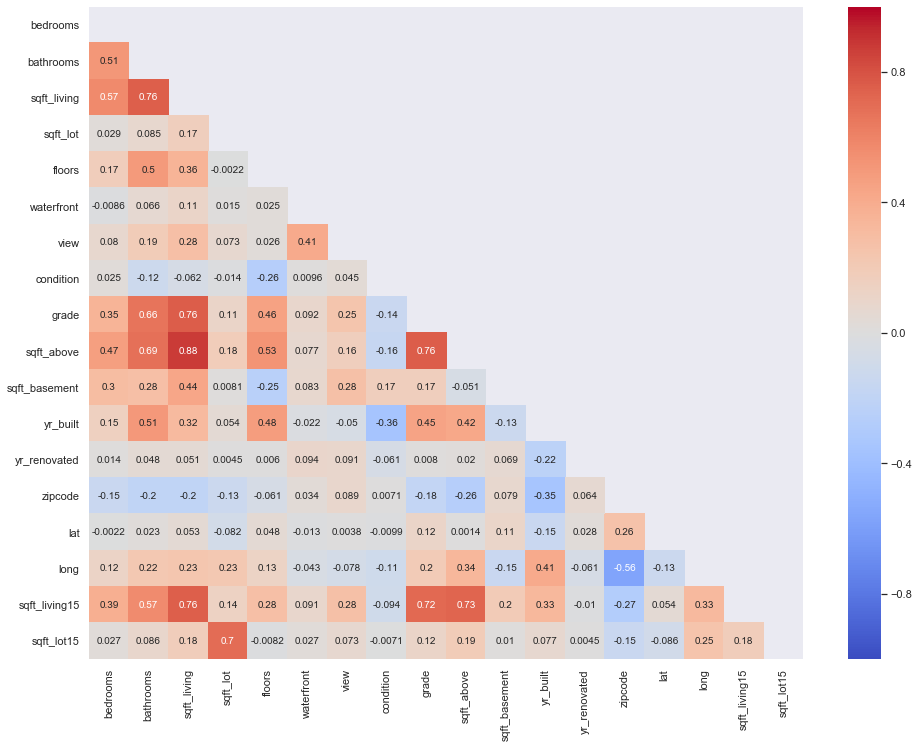

In [9]:
f, ax = plt.subplots(figsize=(16, 12))
matrix = np.triu(features.corr())
sns.heatmap(features.corr(), annot = True, vmin=-1, vmax=1, center= 0, cmap= 'coolwarm', mask = matrix)

## Train test split

In [10]:
# call train_test_split on the data and capture the results
X_train, X_test, y_train, y_test = train_test_split(features_scaled, target, random_state=42,test_size=0.2)

#check the shape of the results
print("Training set - Features: ", X_train.shape, "Target: ", y_train.shape)
print("Training set - Features: ", X_test.shape, "Target: ",y_test.shape)


Training set - Features:  (13832, 18) Target:  (13832,)
Training set - Features:  (3458, 18) Target:  (3458,)


## Create the multiple linear regression

### Multiple Regression - 1 (all features, no pre-processing)

#### Training data

In [11]:
reg = LinearRegression()
reg.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

#### Get coefficients

In [12]:
reg.coef_

array([-32945.44931976,  32021.12599608,  85387.3306987 ,   5150.08565499,
         2873.93479931,  52295.31681942,  40555.58301067,  18479.38801625,
       111624.76307035,  79890.68757578,  27772.34713157, -77390.14692002,
         7160.01906823, -30447.25933837,  83511.5921715 , -30827.51081959,
        13055.43755106,  -9638.66689396])

#### Get intercept

In [13]:
reg.intercept_

540154.2645224854

#### Feature summary and weights

In [14]:
features_df = pd.DataFrame(data = features.columns.values, columns=['Features'])
features_df

,Features
0,bedrooms
1,bathrooms
2,sqft_living
3,sqft_lot
4,floors
5,waterfront
6,view
7,condition
8,grade
9,sqft_above


In [15]:
p_values = f_regression(X_train,y_train)[1]
p_values

array([1.10680784e-301, 0.00000000e+000, 0.00000000e+000, 8.41668610e-024,
       4.15765685e-208, 1.94648933e-238, 0.00000000e+000, 2.37560983e-007,
       0.00000000e+000, 0.00000000e+000, 0.00000000e+000, 5.33231772e-011,
       4.01878922e-043, 2.97836695e-010, 8.58462842e-285, 9.98917315e-003,
       0.00000000e+000, 1.17572027e-019])

In [16]:
features_df['Weights'] = reg.coef_
features_df['P Values'] = p_values.round(3)
features_df.sort_values(['Weights'], ascending=False)

,Features,Weights,P Values
8,grade,111624.763070,0.00
2,sqft_living,85387.330699,0.00
14,lat,83511.592171,0.00
9,sqft_above,79890.687576,0.00
5,waterfront,52295.316819,0.00
6,view,40555.583011,0.00
1,bathrooms,32021.125996,0.00
10,sqft_basement,27772.347132,0.00
7,condition,18479.388016,0.00
16,sqft_living15,13055.437551,0.00


#### Get r^2 score and adjusted r^2 score

In [17]:
r2_train = reg.score(X_train, y_train)
r2_train

0.6970071254200643

In [18]:
n = X_train.shape[0]
p = X_train.shape[1]

adjusted_r2_train = 1-(1-r2_train)*(n-1)/(n-p-1)
adjusted_r2_train

0.696612289269884

#### Get error

In [19]:
y_train_pred = reg.predict(X_train)

In [20]:
train_mae = metrics.mean_absolute_error(y_train, y_train_pred)
train_mse = metrics.mean_squared_error(y_train, y_train_pred)
train_rmse = np.sqrt(metrics.mean_squared_error(y_train, y_train_pred))

print('Mean Absolute Error:', train_mae )
print('Mean Squared Error:',  train_mse)
print('Root Mean Squared Error:' , train_rmse)

Mean Absolute Error: 127865.68450146986
Mean Squared Error: 42696724677.65793
Root Mean Squared Error: 206631.8578478593


In [21]:
price_std = target.std()

print('Mean Absolute Error:', train_mae/price_std )
print('Root Mean Squared Error:' , train_rmse/price_std)

Mean Absolute Error: 0.3425105386547823
Root Mean Squared Error: 0.5534994725961455


#### Test Data

In [22]:
reg.score(X_test, y_test)

0.7027786929887427

In [23]:
r2_test = reg.score(X_test, y_test)
n = X_test.shape[0]
p = X_test.shape[1]

adjusted_r2_test = 1-(1-r2_test)*(n-1)/(n-p-1)
adjusted_r2_test

0.7012230129869391

In [24]:
y_test_pred = reg.predict(X_test)

In [25]:
test_mae = metrics.mean_absolute_error(y_test, y_test_pred)
test_mse = metrics.mean_squared_error(y_test, y_test_pred)
test_rmse = np.sqrt(metrics.mean_squared_error(y_test, y_test_pred))

print('Mean Absolute Error:', test_mae )
print('Mean Squared Error:',  test_mse)
print('Root Mean Squared Error:' , test_rmse)

Mean Absolute Error: 123704.29845359181
Mean Squared Error: 39547299966.78129
Root Mean Squared Error: 198865.02952198833


In [26]:
print('Mean Absolute Error  Z:', test_mae/price_std )
print('Root Mean Squared Error Z:' , test_rmse/price_std)

Mean Absolute Error  Z: 0.3313635402840598
Root Mean Squared Error Z: 0.5326946682117235


Text(0, 0.5, 'Predictions')

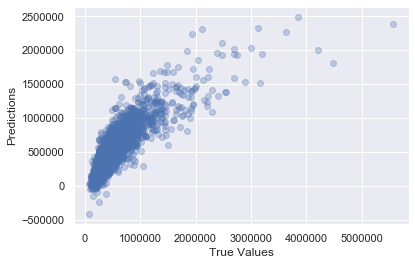

In [27]:
plt.scatter(y_test, y_test_pred, alpha=0.3)
plt.xlabel("True Values")
plt.ylabel("Predictions")

In [28]:
summary_df = pd.DataFrame(columns=['Model', 'Description','Root Mean Squared Error (RMSE)', 'R-squared (training)', 'Adjusted R-squared (training)','R-squared (test)', 'Adjusted R-squared (test)', '5-fold Cross Validation'])
summary_df

,Model,Description,Root Mean Squared Error (RMSE),R-squared (training),Adjusted R-squared (training),R-squared (test),Adjusted R-squared (test),5-fold Cross Validation


In [29]:
r2_test

0.7027786929887427

#### Updated summary table of all models

In [30]:
summary_df = summary_df.append({'Model' : 'Multiple Regression-1', 'Description' : 'All features, no pre-processing' , 'Root Mean Squared Error (RMSE)' : train_rmse, 'R-squared (training)' : r2_train, 'Adjusted R-squared (training)': adjusted_r2_train, 'R-squared (test)' : r2_test, 'Adjusted R-squared (test)' : adjusted_r2_test} , ignore_index=True)
summary_df

,Model,Description,Root Mean Squared Error (RMSE),R-squared (training),Adjusted R-squared (training),R-squared (test),Adjusted R-squared (test),5-fold Cross Validation
0,Multiple Regression-1,"All features, no pre-processing",206631.857848,0.697007,0.696612,0.702779,0.701223,NaN


In [31]:
model = sm.OLS(target, features)
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                  price   R-squared (uncentered):                   0.903
Model:                            OLS   Adj. R-squared (uncentered):              0.902
Method:                 Least Squares   F-statistic:                              9413.
Date:                Thu, 19 Mar 2020   Prob (F-statistic):                        0.00
Time:                        16:12:38   Log-Likelihood:                     -2.3601e+05
No. Observations:               17290   AIC:                                  4.721e+05
Df Residuals:                   17273   BIC:                                  4.722e+05
Df Model:                          17                                                  
Covariance Type:            nonrobust                                                  
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
bedrooms      -3.611e+04   2113.128    -17.086      0.000   -4.02e+04    -3.2e+04
bathrooms      4.119e+04   3700.276     11.131      0.000    3.39e+04    4.84e+04
sqft_living     114.1225      2.573     44.362      0.000     109.080     119.165
sqft_lot          0.1076      0.052      2.062      0.039       0.005       0.210
floors         4631.0071   4033.232      1.148      0.251   -3274.536    1.25e+04
waterfront     5.949e+05   1.93e+04     30.811      0.000    5.57e+05    6.33e+05
view           5.216e+04   2401.836     21.718      0.000    4.75e+04    5.69e+04
condition      2.681e+04   2640.670     10.154      0.000    2.16e+04     3.2e+04
grade            9.5e+04   2451.049     38.758      0.000    9.02e+04    9.98e+04
sqft_above       73.5538      2.559     28.743      0.000      68.538      78.570
sqft_basement    40.5688      2.983     13.599      0.000      34.721      46.416
yr_built      -2614.0677     77.361    -33.791      0.000   -2765.703   -2462.433
yr_renovated     17.8591      4.164      4.289      0.000       9.697      26.021
zipcode        -524.0343     20.215    -25.923      0.000    -563.658    -484.411
lat            6.017e+05   1.22e+04     49.201      0.000    5.78e+05    6.26e+05
long          -2.229e+05   1.48e+04    -15.047      0.000   -2.52e+05   -1.94e+05
sqft_living15    22.9995      3.870      5.942      0.000      15.413      30.586
sqft_lot15       -0.3157      0.082     -3.858      0.000      -0.476      -0.155
==============================================================================
Omnibus:                    15326.214   Durbin-Watson:                   1.997
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          1735225.168
Skew:                           3.784   Prob(JB):                         0.00
Kurtosis:                      51.491   Cond. No.                     4.76e+17
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 7.75e-22. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

### Multiple Regression - 2 (without sqft_above)

In [32]:
target = df['price']
features2 = df[['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors', 'waterfront', 'view' , 'condition', 'grade', 'sqft_basement', 'yr_built', 'yr_renovated',
       'zipcode', 'lat', 'long', 'sqft_living15', 'sqft_lot15']]

In [33]:
scaler.fit(features2)

StandardScaler(copy=True, with_mean=True, with_std=True)

In [34]:
features_scaled = scaler.transform(features2)
features_scaled


array([[ 0.66806994,  0.17918873, -0.01246164, ...,  0.37101341,
         0.58706685, -0.19001514],
       [ 1.73267171,  1.15264072,  0.88972019, ..., -0.50223539,
         0.55786051, -0.24205974],
       [ 0.66806994,  0.50367273,  1.83538065, ...,  0.60529967,
         2.51468528, -0.11710863],
       ...,
       [-0.39653183, -1.44323124, -1.12116701, ..., -0.33894497,
        -0.33293285, -0.12746613],
       [-0.39653183, -0.79426325, -0.19724586, ...,  1.59214181,
         0.13436859,  3.49490383],
       [-0.39653183, -0.79426325, -0.81681651, ..., -0.74362124,
        -0.97547232, -0.21903083]])

#### Training data

In [35]:
# call train_test_split on the data and capture the results
X_train, X_test, y_train, y_test = train_test_split(features_scaled, target, random_state=42,test_size=0.2)

#check the shape of the results
print("Training set - Features: ", X_train.shape, "Target: ", y_train.shape)
print("Training set - Features: ", X_test.shape, "Target: ",y_test.shape)


Training set - Features:  (13832, 17) Target:  (13832,)
Training set - Features:  (3458, 17) Target:  (3458,)


In [36]:
reg = LinearRegression()
reg.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

#### Get coefficients

In [37]:
reg.coef_

array([-32945.44931976,  32021.12599608, 174021.125938  ,   5150.08565499,
         2873.93479931,  52295.31681942,  40555.58301067,  18479.38801625,
       111624.76307035, -14920.52352248, -77390.14692002,   7160.01906823,
       -30447.25933837,  83511.5921715 , -30827.51081959,  13055.43755106,
        -9638.66689396])

#### Get intercept

In [38]:
reg.intercept_

540154.2645224856

#### Feature summary and weights

In [39]:
features2_df = pd.DataFrame(data = features2.columns.values, columns=['Features'])
features2_df

,Features
0,bedrooms
1,bathrooms
2,sqft_living
3,sqft_lot
4,floors
5,waterfront
6,view
7,condition
8,grade
9,sqft_basement


In [40]:
p_values = f_regression(X_train,y_train)[1]
p_values

array([1.10680784e-301, 0.00000000e+000, 0.00000000e+000, 8.41668610e-024,
       4.15765685e-208, 1.94648933e-238, 0.00000000e+000, 2.37560983e-007,
       0.00000000e+000, 0.00000000e+000, 5.33231772e-011, 4.01878922e-043,
       2.97836695e-010, 8.58462842e-285, 9.98917315e-003, 0.00000000e+000,
       1.17572027e-019])

In [41]:
features2_df['Weights'] = reg.coef_
features2_df['P Values'] = p_values.round(3)
features2_df.sort_values(['Weights'], ascending=False)

,Features,Weights,P Values
2,sqft_living,174021.125938,0.00
8,grade,111624.763070,0.00
13,lat,83511.592171,0.00
5,waterfront,52295.316819,0.00
6,view,40555.583011,0.00
1,bathrooms,32021.125996,0.00
7,condition,18479.388016,0.00
15,sqft_living15,13055.437551,0.00
11,yr_renovated,7160.019068,0.00
3,sqft_lot,5150.085655,0.00


#### Get r^2 score and adjusted r^2 score

In [42]:
r2_train = reg.score(X_train, y_train)
r2_train

0.6970071254200643

In [43]:
n = X_train.shape[0]
p = X_train.shape[1]

adjusted_r2_train = 1-(1-r2_train)*(n-1)/(n-p-1)
adjusted_r2_train

0.6966342516059729

#### Get error

In [44]:
y_train_pred = reg.predict(X_train)

In [45]:
train_mae = metrics.mean_absolute_error(y_train, y_train_pred)
train_mse = metrics.mean_squared_error(y_train, y_train_pred)
train_rmse = np.sqrt(metrics.mean_squared_error(y_train, y_train_pred))

print('Mean Absolute Error:', train_mae )
print('Mean Squared Error:',  train_mse)
print('Root Mean Squared Error:' , train_rmse)

Mean Absolute Error: 127865.68450146989
Mean Squared Error: 42696724677.65793
Root Mean Squared Error: 206631.8578478593


In [46]:
price_std = target.std()

print('Mean Absolute Error:', train_mae/price_std )
print('Root Mean Squared Error:' , train_rmse/price_std)

Mean Absolute Error: 0.3425105386547824
Root Mean Squared Error: 0.5534994725961455


#### Test Data

In [47]:
reg.score(X_test, y_test)

0.7027786929887427

In [48]:
r2_test = reg.score(X_test, y_test)
n = X_test.shape[0]
p = X_test.shape[1]

adjusted_r2_test = 1-(1-r2_test)*(n-1)/(n-p-1)
adjusted_r2_test

0.7013098667622336

In [49]:
y_test_pred = reg.predict(X_test)

In [50]:
test_mae = metrics.mean_absolute_error(y_test, y_test_pred)
test_mse = metrics.mean_squared_error(y_test, y_test_pred)
test_rmse = np.sqrt(metrics.mean_squared_error(y_test, y_test_pred))

print('Mean Absolute Error:', test_mae )
print('Mean Squared Error:',  test_mse)
print('Root Mean Squared Error:' , test_rmse)

Mean Absolute Error: 123704.29845359182
Mean Squared Error: 39547299966.78128
Root Mean Squared Error: 198865.0295219883


In [51]:
print('Mean Absolute Error  Z:', test_mae/price_std )
print('Root Mean Squared Error Z:' , test_rmse/price_std)

Mean Absolute Error  Z: 0.33136354028405984
Root Mean Squared Error Z: 0.5326946682117235


Text(0, 0.5, 'Predictions')

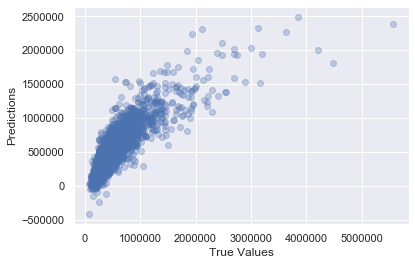

In [52]:
plt.scatter(y_test, y_test_pred, alpha=0.3)
plt.xlabel("True Values")
plt.ylabel("Predictions")

In [53]:
r2_test

0.7027786929887427

#### Updated summary table of all models

In [54]:
summary_df = summary_df.append({'Model' : 'Multiple Regression-2', 'Description' : 'Minus sqft_above' , 'Root Mean Squared Error (RMSE)' : train_rmse, 'R-squared (training)' : r2_train, 'Adjusted R-squared (training)': adjusted_r2_train, 'R-squared (test)' : r2_test, 'Adjusted R-squared (test)' : adjusted_r2_test} , ignore_index=True)
summary_df

,Model,Description,Root Mean Squared Error (RMSE),R-squared (training),Adjusted R-squared (training),R-squared (test),Adjusted R-squared (test),5-fold Cross Validation
0,Multiple Regression-1,"All features, no pre-processing",206631.857848,0.697007,0.696612,0.702779,0.701223,NaN
1,Multiple Regression-2,Minus sqft_above,206631.857848,0.697007,0.696634,0.702779,0.701310,NaN


### Multiple Regression - 3 (all features polynomial 1st degree)

In [55]:
target = df['price']
features2 = df[['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors', 'waterfront', 'view' , 'condition', 'grade', 'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated',
       'zipcode', 'lat', 'long', 'sqft_living15', 'sqft_lot15']]

In [56]:
scaler.fit(features2)

StandardScaler(copy=True, with_mean=True, with_std=True)

In [57]:
features_scaled = scaler.transform(features2)
features_scaled


array([[ 0.66806994,  0.17918873, -0.01246164, ...,  0.37101341,
         0.58706685, -0.19001514],
       [ 1.73267171,  1.15264072,  0.88972019, ..., -0.50223539,
         0.55786051, -0.24205974],
       [ 0.66806994,  0.50367273,  1.83538065, ...,  0.60529967,
         2.51468528, -0.11710863],
       ...,
       [-0.39653183, -1.44323124, -1.12116701, ..., -0.33894497,
        -0.33293285, -0.12746613],
       [-0.39653183, -0.79426325, -0.19724586, ...,  1.59214181,
         0.13436859,  3.49490383],
       [-0.39653183, -0.79426325, -0.81681651, ..., -0.74362124,
        -0.97547232, -0.21903083]])

#### Training data

In [58]:
# call train_test_split on the data and capture the results
X_train, X_test, y_train, y_test = train_test_split(features_scaled, target, random_state=42,test_size=0.2)

#check the shape of the results
print("Training set - Features: ", X_train.shape, "Target: ", y_train.shape)
print("Training set - Features: ", X_test.shape, "Target: ",y_test.shape)


Training set - Features:  (13832, 18) Target:  (13832,)
Training set - Features:  (3458, 18) Target:  (3458,)


In [59]:
poly = PolynomialFeatures(1)
X_train = poly.fit_transform(X_train)
X_test = poly.fit_transform(X_test)

In [60]:
reg = LinearRegression()
reg.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

#### Get coefficients

In [61]:
reg.coef_

array([     0.        , -32945.44931976,  32021.12599608,  85387.3306987 ,
         5150.08565499,   2873.93479931,  52295.31681942,  40555.58301067,
        18479.38801625, 111624.76307035,  79890.68757578,  27772.34713157,
       -77390.14692002,   7160.01906823, -30447.25933837,  83511.5921715 ,
       -30827.51081959,  13055.43755106,  -9638.66689396])

#### Get intercept

In [62]:
reg.intercept_

540154.2645224856

#### Feature summary and weights

In [63]:
features2_df = pd.DataFrame(data = features2.columns.values, columns=['Features'])
features2_df

,Features
0,bedrooms
1,bathrooms
2,sqft_living
3,sqft_lot
4,floors
5,waterfront
6,view
7,condition
8,grade
9,sqft_above


In [64]:
p_values = f_regression(X_train,y_train)[1]
p_values

array([            nan, 1.10680784e-301, 0.00000000e+000, 0.00000000e+000,
       8.41668610e-024, 4.15765685e-208, 1.94648933e-238, 0.00000000e+000,
       2.37560983e-007, 0.00000000e+000, 0.00000000e+000, 0.00000000e+000,
       5.33231772e-011, 4.01878922e-043, 2.97836695e-010, 8.58462842e-285,
       9.98917315e-003, 0.00000000e+000, 1.17572027e-019])

#### Get r^2 score and adjusted r^2 score

In [65]:
r2_train = reg.score(X_train, y_train)
r2_train

0.6970071254200643

In [66]:
n = X_train.shape[0]
p = X_train.shape[1]

adjusted_r2_train = 1-(1-r2_train)*(n-1)/(n-p-1)
adjusted_r2_train

0.6965903237536135

#### Get error

In [67]:
y_train_pred = reg.predict(X_train)

In [68]:
train_mae = metrics.mean_absolute_error(y_train, y_train_pred)
train_mse = metrics.mean_squared_error(y_train, y_train_pred)
train_rmse = np.sqrt(metrics.mean_squared_error(y_train, y_train_pred))

print('Mean Absolute Error:', train_mae )
print('Mean Squared Error:',  train_mse)
print('Root Mean Squared Error:' , train_rmse)

Mean Absolute Error: 127865.68450146986
Mean Squared Error: 42696724677.65793
Root Mean Squared Error: 206631.8578478593


In [69]:
price_std = target.std()

print('Mean Absolute Error:', train_mae/price_std )
print('Root Mean Squared Error:' , train_rmse/price_std)

Mean Absolute Error: 0.3425105386547823
Root Mean Squared Error: 0.5534994725961455


#### Test Data

In [70]:
reg.score(X_test, y_test)

0.7027786929887428

In [71]:
r2_test = reg.score(X_test, y_test)
n = X_test.shape[0]
p = X_test.shape[1]

adjusted_r2_test = 1-(1-r2_test)*(n-1)/(n-p-1)
adjusted_r2_test

0.7011361086858883

In [72]:
y_test_pred = reg.predict(X_test)

In [73]:
test_mae = metrics.mean_absolute_error(y_test, y_test_pred)
test_mse = metrics.mean_squared_error(y_test, y_test_pred)
test_rmse = np.sqrt(metrics.mean_squared_error(y_test, y_test_pred))

print('Mean Absolute Error:', test_mae )
print('Mean Squared Error:',  test_mse)
print('Root Mean Squared Error:' , test_rmse)

Mean Absolute Error: 123704.29845359176
Mean Squared Error: 39547299966.78128
Root Mean Squared Error: 198865.0295219883


In [74]:
print('Mean Absolute Error  Z:', test_mae/price_std )
print('Root Mean Squared Error Z:' , test_rmse/price_std)

Mean Absolute Error  Z: 0.3313635402840597
Root Mean Squared Error Z: 0.5326946682117235


Text(0, 0.5, 'Predictions')

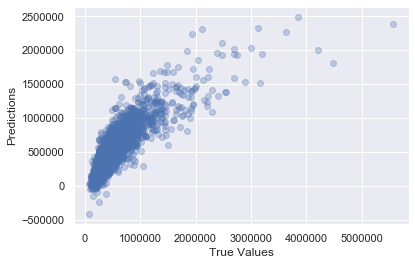

In [75]:
plt.scatter(y_test, y_test_pred, alpha=0.3)
plt.xlabel("True Values")
plt.ylabel("Predictions")

In [76]:
r2_test

0.7027786929887428

#### Updated summary table of all models

In [77]:
summary_df = summary_df.append({'Model' : 'Multiple Regression-3', 'Description' : 'All features 1st degree polynomial' , 'Root Mean Squared Error (RMSE)' : train_rmse, 'R-squared (training)' : r2_train, 'Adjusted R-squared (training)': adjusted_r2_train, 'R-squared (test)' : r2_test, 'Adjusted R-squared (test)' : adjusted_r2_test} , ignore_index=True)
summary_df

,Model,Description,Root Mean Squared Error (RMSE),R-squared (training),Adjusted R-squared (training),R-squared (test),Adjusted R-squared (test),5-fold Cross Validation
0,Multiple Regression-1,"All features, no pre-processing",206631.857848,0.697007,0.696612,0.702779,0.701223,NaN
1,Multiple Regression-2,Minus sqft_above,206631.857848,0.697007,0.696634,0.702779,0.701310,NaN
2,Multiple Regression-3,All features 1st degree polynomial,206631.857848,0.697007,0.696590,0.702779,0.701136,NaN


### Multiple Regression - 4 (all features polynomial 2nd degree)

In [78]:
target = df['price']
features2 = df[['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors', 'waterfront', 'view' , 'condition', 'grade', 'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated',
       'zipcode', 'lat', 'long', 'sqft_living15', 'sqft_lot15']]

In [79]:
scaler.fit(features2)

StandardScaler(copy=True, with_mean=True, with_std=True)

In [80]:
features_scaled = scaler.transform(features2)
features_scaled


array([[ 0.66806994,  0.17918873, -0.01246164, ...,  0.37101341,
         0.58706685, -0.19001514],
       [ 1.73267171,  1.15264072,  0.88972019, ..., -0.50223539,
         0.55786051, -0.24205974],
       [ 0.66806994,  0.50367273,  1.83538065, ...,  0.60529967,
         2.51468528, -0.11710863],
       ...,
       [-0.39653183, -1.44323124, -1.12116701, ..., -0.33894497,
        -0.33293285, -0.12746613],
       [-0.39653183, -0.79426325, -0.19724586, ...,  1.59214181,
         0.13436859,  3.49490383],
       [-0.39653183, -0.79426325, -0.81681651, ..., -0.74362124,
        -0.97547232, -0.21903083]])

#### Training data

In [81]:
# call train_test_split on the data and capture the results
X_train, X_test, y_train, y_test = train_test_split(features_scaled, target, random_state=42,test_size=0.2)

#check the shape of the results
print("Training set - Features: ", X_train.shape, "Target: ", y_train.shape)
print("Training set - Features: ", X_test.shape, "Target: ",y_test.shape)


Training set - Features:  (13832, 18) Target:  (13832,)
Training set - Features:  (3458, 18) Target:  (3458,)


In [82]:
poly = PolynomialFeatures(2)
X_train = poly.fit_transform(X_train)
X_test = poly.fit_transform(X_test)

In [83]:
reg = LinearRegression()
reg.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

#### Get coefficients

In [84]:
reg.coef_

array([ 6.33294913e+11, -3.92233919e+03,  1.45159218e+04,  1.47475344e+15,
        1.65290699e+04, -1.24398033e+04,  1.34087838e+14,  1.21099472e+04,
        2.77951195e+04,  8.76677656e+04, -1.32927927e+15, -7.10354981e+14,
       -1.82523438e+04, -8.67838883e+05, -4.96907656e+04,  7.72036719e+04,
       -5.86958750e+04,  4.31341016e+04, -2.06935000e+04,  8.92156250e+02,
        3.11414844e+03, -2.43332879e+14, -2.39720703e+03,  9.80142773e+03,
        5.24757812e+02, -8.57375000e+02, -2.72494531e+03, -2.83281250e+03,
        2.19329782e+14,  1.17207879e+14, -5.21742969e+03, -2.42868359e+03,
        1.69888281e+03, -4.39989062e+03,  7.49640625e+03,  9.69863281e+03,
        7.82525781e+03,  5.48687500e+02, -3.78751868e+14, -1.72744453e+04,
       -1.41288672e+04,  2.43685938e+03,  5.36506250e+03, -4.39045508e+03,
        1.41790781e+04,  3.41390629e+14,  1.82436106e+14,  3.05411719e+03,
       -7.78789844e+03, -3.63660156e+03,  1.06160234e+04, -9.29071875e+03,
       -1.49656250e+02,  

#### Get intercept

In [85]:
reg.intercept_

11491653500754.25

#### Feature summary and weights

In [86]:
features2_df = pd.DataFrame(data = features2.columns.values, columns=['Features'])
features2_df

,Features
0,bedrooms
1,bathrooms
2,sqft_living
3,sqft_lot
4,floors
5,waterfront
6,view
7,condition
8,grade
9,sqft_above


In [87]:
p_values = f_regression(X_train,y_train)[1]
p_values

array([            nan, 1.10680784e-301, 0.00000000e+000, 0.00000000e+000,
       8.41668610e-024, 4.15765685e-208, 1.94648933e-238, 0.00000000e+000,
       2.37560983e-007, 0.00000000e+000, 0.00000000e+000, 0.00000000e+000,
       5.33231772e-011, 4.01878922e-043, 2.97836695e-010, 8.58462842e-285,
       9.98917315e-003, 0.00000000e+000, 1.17572027e-019, 2.32603421e-003,
       1.00092091e-203, 0.00000000e+000, 1.67519591e-003, 1.15884563e-036,
       4.32547935e-035, 8.37522008e-122, 1.98548415e-001, 3.09178183e-272,
       0.00000000e+000, 2.15962016e-102, 6.57745225e-005, 7.58380412e-015,
       8.30332384e-003, 2.87527791e-031, 1.19828520e-002, 6.26728740e-227,
       3.58596558e-004, 0.00000000e+000, 0.00000000e+000, 3.40974913e-025,
       1.74516701e-096, 3.84718547e-245, 0.00000000e+000, 1.49518956e-001,
       0.00000000e+000, 0.00000000e+000, 0.00000000e+000, 6.09979276e-002,
       6.87778777e-064, 2.10162534e-008, 1.49321412e-058, 5.72694131e-002,
       0.00000000e+000, 2

#### Get r^2 score and adjusted r^2 score

In [88]:
r2_train = reg.score(X_train, y_train)
r2_train

0.8356315083586707

In [89]:
n = X_train.shape[0]
p = X_train.shape[1]

adjusted_r2_train = 1-(1-r2_train)*(n-1)/(n-p-1)
adjusted_r2_train

0.8333420857788121

#### Get error

In [90]:
y_train_pred = reg.predict(X_train)

In [91]:
train_mae = metrics.mean_absolute_error(y_train, y_train_pred)
train_mse = metrics.mean_squared_error(y_train, y_train_pred)
train_rmse = np.sqrt(metrics.mean_squared_error(y_train, y_train_pred))

print('Mean Absolute Error:', train_mae )
print('Mean Squared Error:',  train_mse)
print('Root Mean Squared Error:' , train_rmse)

Mean Absolute Error: 98911.49306592616
Mean Squared Error: 23162248429.179684
Root Mean Squared Error: 152191.48606009365


In [92]:
price_std = target.std()

print('Mean Absolute Error:', train_mae/price_std )
print('Root Mean Squared Error:' , train_rmse/price_std)

Mean Absolute Error: 0.26495168661744967
Root Mean Squared Error: 0.40767144110909015


#### Test Data

In [93]:
reg.score(X_test, y_test)

0.8122092443481933

In [94]:
r2_test = reg.score(X_test, y_test)
n = X_test.shape[0]
p = X_test.shape[1]

adjusted_r2_test = 1-(1-r2_test)*(n-1)/(n-p-1)
adjusted_r2_test

0.8012878352346815

In [95]:
y_test_pred = reg.predict(X_test)

In [96]:
test_mae = metrics.mean_absolute_error(y_test, y_test_pred)
test_mse = metrics.mean_squared_error(y_test, y_test_pred)
test_rmse = np.sqrt(metrics.mean_squared_error(y_test, y_test_pred))

print('Mean Absolute Error:', test_mae )
print('Mean Squared Error:',  test_mse)
print('Root Mean Squared Error:' , test_rmse)

Mean Absolute Error: 100726.86880173691
Mean Squared Error: 24986826884.75374
Root Mean Squared Error: 158072.2204713837


In [97]:
print('Mean Absolute Error  Z:', test_mae/price_std )
print('Root Mean Squared Error Z:' , test_rmse/price_std)

Mean Absolute Error  Z: 0.2698144871691193
Root Mean Squared Error Z: 0.42342401396512896


Text(0, 0.5, 'Predictions')

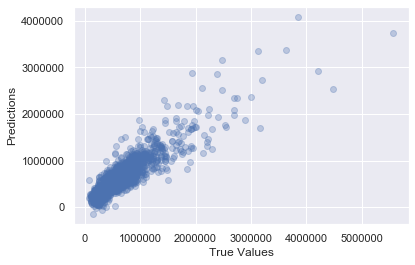

In [98]:
plt.scatter(y_test, y_test_pred, alpha=0.3)
plt.xlabel("True Values")
plt.ylabel("Predictions")

In [99]:
r2_test

0.8122092443481933

#### Updated summary table of all models

In [100]:
summary_df = summary_df.append({'Model' : 'Multiple Regression-4', 'Description' : 'All features, 2nd degree polynomial' , 'Root Mean Squared Error (RMSE)' : train_rmse, 'R-squared (training)' : r2_train, 'Adjusted R-squared (training)': adjusted_r2_train, 'R-squared (test)' : r2_test, 'Adjusted R-squared (test)' : adjusted_r2_test} , ignore_index=True)
summary_df

,Model,Description,Root Mean Squared Error (RMSE),R-squared (training),Adjusted R-squared (training),R-squared (test),Adjusted R-squared (test),5-fold Cross Validation
0,Multiple Regression-1,"All features, no pre-processing",206631.857848,0.697007,0.696612,0.702779,0.701223,NaN
1,Multiple Regression-2,Minus sqft_above,206631.857848,0.697007,0.696634,0.702779,0.701310,NaN
2,Multiple Regression-3,All features 1st degree polynomial,206631.857848,0.697007,0.696590,0.702779,0.701136,NaN
3,Multiple Regression-4,"All features, 2nd degree polynomial",152191.486060,0.835632,0.833342,0.812209,0.801288,NaN


### Multiple Regression - 5 (minus sqft_above, polynomial 1st degree)

In [101]:
target = df['price']
features2 = df[['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors', 'waterfront', 'view' , 'condition', 'grade', 'sqft_basement', 'yr_built', 'yr_renovated',
       'zipcode', 'lat', 'long', 'sqft_living15', 'sqft_lot15']]

In [102]:
scaler.fit(features2)

StandardScaler(copy=True, with_mean=True, with_std=True)

In [103]:
features_scaled = scaler.transform(features2)
features_scaled


array([[ 0.66806994,  0.17918873, -0.01246164, ...,  0.37101341,
         0.58706685, -0.19001514],
       [ 1.73267171,  1.15264072,  0.88972019, ..., -0.50223539,
         0.55786051, -0.24205974],
       [ 0.66806994,  0.50367273,  1.83538065, ...,  0.60529967,
         2.51468528, -0.11710863],
       ...,
       [-0.39653183, -1.44323124, -1.12116701, ..., -0.33894497,
        -0.33293285, -0.12746613],
       [-0.39653183, -0.79426325, -0.19724586, ...,  1.59214181,
         0.13436859,  3.49490383],
       [-0.39653183, -0.79426325, -0.81681651, ..., -0.74362124,
        -0.97547232, -0.21903083]])

#### Training data

In [104]:
# call train_test_split on the data and capture the results
X_train, X_test, y_train, y_test = train_test_split(features_scaled, target, random_state=42,test_size=0.2)

#check the shape of the results
print("Training set - Features: ", X_train.shape, "Target: ", y_train.shape)
print("Training set - Features: ", X_test.shape, "Target: ",y_test.shape)


Training set - Features:  (13832, 17) Target:  (13832,)
Training set - Features:  (3458, 17) Target:  (3458,)


In [105]:
poly = PolynomialFeatures(1)
X_train = poly.fit_transform(X_train)
X_test = poly.fit_transform(X_test)

In [106]:
reg = LinearRegression()
reg.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

#### Get coefficients

In [107]:
reg.coef_

array([     0.        , -32945.44931976,  32021.12599608, 174021.125938  ,
         5150.08565499,   2873.93479931,  52295.31681942,  40555.58301067,
        18479.38801625, 111624.76307035, -14920.52352248, -77390.14692002,
         7160.01906823, -30447.25933837,  83511.5921715 , -30827.51081959,
        13055.43755106,  -9638.66689396])

#### Get intercept

In [108]:
reg.intercept_

540154.2645224856

#### Feature summary and weights

In [109]:
features2_df = pd.DataFrame(data = features2.columns.values, columns=['Features'])
features2_df

,Features
0,bedrooms
1,bathrooms
2,sqft_living
3,sqft_lot
4,floors
5,waterfront
6,view
7,condition
8,grade
9,sqft_basement


In [110]:
p_values = f_regression(X_train,y_train)[1]
p_values

array([            nan, 1.10680784e-301, 0.00000000e+000, 0.00000000e+000,
       8.41668610e-024, 4.15765685e-208, 1.94648933e-238, 0.00000000e+000,
       2.37560983e-007, 0.00000000e+000, 0.00000000e+000, 5.33231772e-011,
       4.01878922e-043, 2.97836695e-010, 8.58462842e-285, 9.98917315e-003,
       0.00000000e+000, 1.17572027e-019])

#### Get r^2 score and adjusted r^2 score

In [111]:
r2_train = reg.score(X_train, y_train)
r2_train

0.6970071254200643

In [112]:
n = X_train.shape[0]
p = X_train.shape[1]

adjusted_r2_train = 1-(1-r2_train)*(n-1)/(n-p-1)
adjusted_r2_train

0.696612289269884

#### Get error

In [113]:
y_train_pred = reg.predict(X_train)

In [114]:
train_mae = metrics.mean_absolute_error(y_train, y_train_pred)
train_mse = metrics.mean_squared_error(y_train, y_train_pred)
train_rmse = np.sqrt(metrics.mean_squared_error(y_train, y_train_pred))

print('Mean Absolute Error:', train_mae )
print('Mean Squared Error:',  train_mse)
print('Root Mean Squared Error:' , train_rmse)

Mean Absolute Error: 127865.68450146986
Mean Squared Error: 42696724677.65793
Root Mean Squared Error: 206631.8578478593


In [115]:
price_std = target.std()

print('Mean Absolute Error:', train_mae/price_std )
print('Root Mean Squared Error:' , train_rmse/price_std)

Mean Absolute Error: 0.3425105386547823
Root Mean Squared Error: 0.5534994725961455


#### Test Data

In [116]:
reg.score(X_test, y_test)

0.7027786929887427

In [117]:
r2_test = reg.score(X_test, y_test)
n = X_test.shape[0]
p = X_test.shape[1]

adjusted_r2_test = 1-(1-r2_test)*(n-1)/(n-p-1)
adjusted_r2_test

0.7012230129869391

In [118]:
y_test_pred = reg.predict(X_test)

In [119]:
test_mae = metrics.mean_absolute_error(y_test, y_test_pred)
test_mse = metrics.mean_squared_error(y_test, y_test_pred)
test_rmse = np.sqrt(metrics.mean_squared_error(y_test, y_test_pred))

print('Mean Absolute Error:', test_mae )
print('Mean Squared Error:',  test_mse)
print('Root Mean Squared Error:' , test_rmse)

Mean Absolute Error: 123704.29845359178
Mean Squared Error: 39547299966.78129
Root Mean Squared Error: 198865.02952198833


In [120]:
print('Mean Absolute Error  Z:', test_mae/price_std )
print('Root Mean Squared Error Z:' , test_rmse/price_std)

Mean Absolute Error  Z: 0.3313635402840597
Root Mean Squared Error Z: 0.5326946682117235


Text(0, 0.5, 'Predictions')

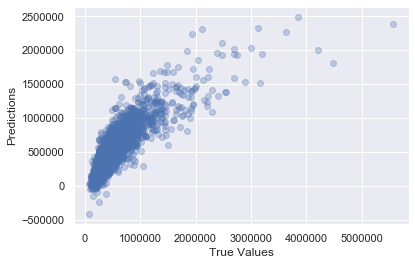

In [121]:
plt.scatter(y_test, y_test_pred, alpha=0.3)
plt.xlabel("True Values")
plt.ylabel("Predictions")

In [122]:
r2_test

0.7027786929887427

#### Updated summary table of all models

In [123]:
summary_df = summary_df.append({'Model' : 'Multiple Regression-5', 'Description' : 'minus sqft_above 1st degree polynomial' , 'Root Mean Squared Error (RMSE)' : train_rmse, 'R-squared (training)' : r2_train, 'Adjusted R-squared (training)': adjusted_r2_train, 'R-squared (test)' : r2_test, 'Adjusted R-squared (test)' : adjusted_r2_test} , ignore_index=True)
summary_df

,Model,Description,Root Mean Squared Error (RMSE),R-squared (training),Adjusted R-squared (training),R-squared (test),Adjusted R-squared (test),5-fold Cross Validation
0,Multiple Regression-1,"All features, no pre-processing",206631.857848,0.697007,0.696612,0.702779,0.701223,NaN
1,Multiple Regression-2,Minus sqft_above,206631.857848,0.697007,0.696634,0.702779,0.701310,NaN
2,Multiple Regression-3,All features 1st degree polynomial,206631.857848,0.697007,0.696590,0.702779,0.701136,NaN
3,Multiple Regression-4,"All features, 2nd degree polynomial",152191.486060,0.835632,0.833342,0.812209,0.801288,NaN
4,Multiple Regression-5,minus sqft_above 1st degree polynomial,206631.857848,0.697007,0.696612,0.702779,0.701223,NaN


### Multiple Regression - 6 (minus sft_above, polynomial 2nd degree)

In [124]:
target = df['price']
features2 = df[['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors', 'waterfront', 'view' , 'condition', 'grade', 'sqft_basement', 'yr_built', 'yr_renovated',
       'zipcode', 'lat', 'long', 'sqft_living15', 'sqft_lot15']]

In [125]:
scaler.fit(features2)

StandardScaler(copy=True, with_mean=True, with_std=True)

In [126]:
features_scaled = scaler.transform(features2)
features_scaled


array([[ 0.66806994,  0.17918873, -0.01246164, ...,  0.37101341,
         0.58706685, -0.19001514],
       [ 1.73267171,  1.15264072,  0.88972019, ..., -0.50223539,
         0.55786051, -0.24205974],
       [ 0.66806994,  0.50367273,  1.83538065, ...,  0.60529967,
         2.51468528, -0.11710863],
       ...,
       [-0.39653183, -1.44323124, -1.12116701, ..., -0.33894497,
        -0.33293285, -0.12746613],
       [-0.39653183, -0.79426325, -0.19724586, ...,  1.59214181,
         0.13436859,  3.49490383],
       [-0.39653183, -0.79426325, -0.81681651, ..., -0.74362124,
        -0.97547232, -0.21903083]])

#### Training data

In [127]:
# call train_test_split on the data and capture the results
X_train, X_test, y_train, y_test = train_test_split(features_scaled, target, random_state=42,test_size=0.2)

#check the shape of the results
print("Training set - Features: ", X_train.shape, "Target: ", y_train.shape)
print("Training set - Features: ", X_test.shape, "Target: ",y_test.shape)


Training set - Features:  (13832, 17) Target:  (13832,)
Training set - Features:  (3458, 17) Target:  (3458,)


In [128]:
poly = PolynomialFeatures(2)
X_train = poly.fit_transform(X_train)
X_test = poly.fit_transform(X_test)

In [129]:
reg = LinearRegression()
reg.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

#### Get coefficients

In [130]:
reg.coef_

array([-5.81795614e+09, -3.93015722e+03,  1.45191988e+04,  1.09041118e+05,
        1.65290035e+04, -1.24328090e+04, -7.35142419e+14,  1.21085644e+04,
        2.77965967e+04,  8.76631094e+04, -1.27655332e+04, -1.82532969e+04,
       -8.67814703e+05, -4.96910742e+04,  7.72038594e+04, -5.86973281e+04,
        4.31345938e+04, -2.06870117e+04,  8.91750000e+02,  3.11521484e+03,
       -2.21425142e+04, -2.39989746e+03,  9.80003516e+03,  5.25335938e+02,
       -8.57277344e+02, -2.72416406e+03, -2.83520312e+03,  1.58596875e+03,
       -5.21666992e+03, -2.42824023e+03,  1.69746240e+03, -4.39863281e+03,
        7.49677344e+03,  9.69824805e+03,  7.82872705e+03,  5.50563477e+02,
        1.78867227e+04, -1.72734219e+04, -1.41289141e+04,  2.43651562e+03,
        5.36450391e+03, -4.39035547e+03,  1.41792295e+04, -1.43307500e+04,
        3.05367993e+03, -7.78629102e+03, -3.63531055e+03,  1.06155265e+04,
       -9.29125781e+03, -1.47269531e+02,  4.78001562e+03,  1.10760156e+04,
       -1.41553652e+04, -

#### Get intercept

In [131]:
reg.intercept_

-66469738254134.445

#### Feature summary and weights

In [132]:
features2_df = pd.DataFrame(data = features2.columns.values, columns=['Features'])
features2_df

,Features
0,bedrooms
1,bathrooms
2,sqft_living
3,sqft_lot
4,floors
5,waterfront
6,view
7,condition
8,grade
9,sqft_basement


In [133]:
p_values = f_regression(X_train,y_train)[1]
p_values

array([            nan, 1.10680784e-301, 0.00000000e+000, 0.00000000e+000,
       8.41668610e-024, 4.15765685e-208, 1.94648933e-238, 0.00000000e+000,
       2.37560983e-007, 0.00000000e+000, 0.00000000e+000, 5.33231772e-011,
       4.01878922e-043, 2.97836695e-010, 8.58462842e-285, 9.98917315e-003,
       0.00000000e+000, 1.17572027e-019, 2.32603421e-003, 1.00092091e-203,
       0.00000000e+000, 1.67519591e-003, 1.15884563e-036, 4.32547935e-035,
       8.37522008e-122, 1.98548415e-001, 3.09178183e-272, 2.15962016e-102,
       6.57745225e-005, 7.58380412e-015, 8.30332384e-003, 2.87527791e-031,
       1.19828520e-002, 6.26728740e-227, 3.58596558e-004, 0.00000000e+000,
       0.00000000e+000, 3.40974913e-025, 1.74516701e-096, 3.84718547e-245,
       0.00000000e+000, 1.49518956e-001, 0.00000000e+000, 0.00000000e+000,
       6.09979276e-002, 6.87778777e-064, 2.10162534e-008, 1.49321412e-058,
       5.72694131e-002, 0.00000000e+000, 2.02471087e-022, 0.00000000e+000,
       2.02641546e-037, 4

#### Get r^2 score and adjusted r^2 score

In [134]:
r2_train = reg.score(X_train, y_train)
r2_train

0.8356320287718904

In [135]:
n = X_train.shape[0]
p = X_train.shape[1]

adjusted_r2_train = 1-(1-r2_train)*(n-1)/(n-p-1)
adjusted_r2_train

0.8335744209329441

#### Get error

In [136]:
y_train_pred = reg.predict(X_train)

In [137]:
train_mae = metrics.mean_absolute_error(y_train, y_train_pred)
train_mse = metrics.mean_squared_error(y_train, y_train_pred)
train_rmse = np.sqrt(metrics.mean_squared_error(y_train, y_train_pred))

print('Mean Absolute Error:', train_mae )
print('Mean Squared Error:',  train_mse)
print('Root Mean Squared Error:' , train_rmse)

Mean Absolute Error: 98896.97666755531
Mean Squared Error: 23162175094.31994
Root Mean Squared Error: 152191.24513032916


In [138]:
price_std = target.std()

print('Mean Absolute Error:', train_mae/price_std )
print('Root Mean Squared Error:' , train_rmse/price_std)

Mean Absolute Error: 0.26491280191241945
Root Mean Squared Error: 0.4076707957366923


#### Test Data

In [139]:
reg.score(X_test, y_test)

0.8122088588456771

In [140]:
r2_test = reg.score(X_test, y_test)
n = X_test.shape[0]
p = X_test.shape[1]

adjusted_r2_test = 1-(1-r2_test)*(n-1)/(n-p-1)
adjusted_r2_test

0.8024364044520711

In [141]:
y_test_pred = reg.predict(X_test)

In [142]:
test_mae = metrics.mean_absolute_error(y_test, y_test_pred)
test_mse = metrics.mean_squared_error(y_test, y_test_pred)
test_rmse = np.sqrt(metrics.mean_squared_error(y_test, y_test_pred))

print('Mean Absolute Error:', test_mae )
print('Mean Squared Error:',  test_mse)
print('Root Mean Squared Error:' , test_rmse)

Mean Absolute Error: 100709.39806698236
Mean Squared Error: 24986878178.46415
Root Mean Squared Error: 158072.38271900677


In [143]:
print('Mean Absolute Error  Z:', test_mae/price_std )
print('Root Mean Squared Error Z:' , test_rmse/price_std)

Mean Absolute Error  Z: 0.2697676887587811
Root Mean Squared Error Z: 0.423424448573687


Text(0, 0.5, 'Predictions')

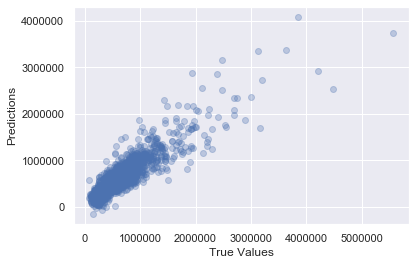

In [144]:
plt.scatter(y_test, y_test_pred, alpha=0.3)
plt.xlabel("True Values")
plt.ylabel("Predictions")

In [145]:
r2_test

0.8122088588456771

#### Updated summary table of all models

In [146]:
summary_df = summary_df.append({'Model' : 'Multiple Regression-6', 'Description' : 'minus sqft_above, 2nd degree polynomial' , 'Root Mean Squared Error (RMSE)' : train_rmse, 'R-squared (training)' : r2_train, 'Adjusted R-squared (training)': adjusted_r2_train, 'R-squared (test)' : r2_test, 'Adjusted R-squared (test)' : adjusted_r2_test} , ignore_index=True)
summary_df

,Model,Description,Root Mean Squared Error (RMSE),R-squared (training),Adjusted R-squared (training),R-squared (test),Adjusted R-squared (test),5-fold Cross Validation
0,Multiple Regression-1,"All features, no pre-processing",206631.857848,0.697007,0.696612,0.702779,0.701223,NaN
1,Multiple Regression-2,Minus sqft_above,206631.857848,0.697007,0.696634,0.702779,0.701310,NaN
2,Multiple Regression-3,All features 1st degree polynomial,206631.857848,0.697007,0.696590,0.702779,0.701136,NaN
3,Multiple Regression-4,"All features, 2nd degree polynomial",152191.486060,0.835632,0.833342,0.812209,0.801288,NaN
4,Multiple Regression-5,minus sqft_above 1st degree polynomial,206631.857848,0.697007,0.696612,0.702779,0.701223,NaN
5,Multiple Regression-6,"minus sqft_above, 2nd degree polynomial",152191.245130,0.835632,0.833574,0.812209,0.802436,NaN
